# Exploring results (MD maps) - Full Factorial

In [2]:
%run /home/grg/git/alfa/nilearn-helper.py
import sys
sys.path.append('/home/grg/git/alfa/')
import multireg_spm12 as mreg
%matplotlib inline

/home/grg/jupyter/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
paramtype = 'MD'
analysis_name='test_fullfact'
analysis_wd = osp.join('/tmp', analysis_name)
spm = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))
aal_fp = '/usr/local/MATLAB/R2014a/toolbox/spm12/toolbox/aal/ROI_MNI_V5.nii'
mask_fp = '/home/grg/spm/MNI_T1_brain_mask.nii'
excel_fp = '/home/grg/spm/designmat/dm_MD_fullfact.xls'
print 'Found SPM files:', spm

Found SPM files: ['/tmp/test_fullfact/estimatecontrasts/SPM.mat']


In [5]:
print 'Reading', excel_fp, 'looking up column', paramtype, '...'
a = mreg.generic_version(excel_fp, analysis_wd, mask_fp, analysis_name)
n1 = a.get_node('modeldesign')
n3 = a.get_node('estimatecontrasts')
print '# of scans included in the analysis:', len(n1.inputs.in_files)
display_html(pd.DataFrame([e for e in n3.inputs.contrasts], 
             columns=['contrast name', 'contrast type', 'covariate names', 'covariate weights']))

Reading /home/grg/spm/designmat/dm_MD_fullfact.xls looking up column MD ...
Analysis name: test_fullfact
First column: MD
Columns in the model: [u'age', u'agesq', u'gender', u'educyears', u'ventricles_FS']
Analysis name: test_fullfact
Scans (514): [u'/home/grg/spm/MD/10070_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10102_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10108_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10235_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10365_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10419_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10463_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10530_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10551_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10563_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10576_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10630_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10668_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10692_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10693_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10703_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10725_MD_MNI

NameError: name 'pd' is not defined

/tmp/test_fullfact/estimatecontrasts/spmF_0005.nii


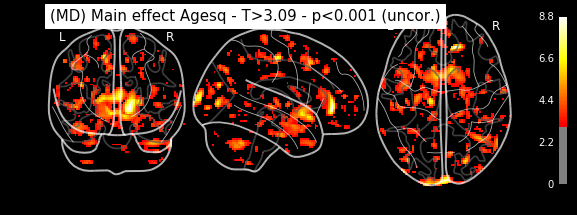

In [12]:
spm_mat_file = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))[0]
for i in range(5, 6):
    img = osp.join(analysis_wd, 'estimatecontrasts/spmF_00%02d.nii'%i)
    print img
    contrast_name = n3.inputs.contrasts[1][0]
    thresholded_map1, threshold1 = map_threshold(img, threshold=0.001, cluster_threshold=0)
    plotting.plot_glass_brain(thresholded_map1,
                      title='(%s) %s - T>%.02f - p<0.001 (uncor.)'%(paramtype, contrast_name, threshold1), colorbar=True,
                      black_bg=True, display_mode='ortho', threshold=threshold1)  
plotting.show()

In [11]:
n3.inputs.contrasts

[(u'Main effect Agesq',
  'T',
  [u'age', u'agesq', u'gender', u'educyears', u'ventricles_FS'],
  [0.0, 1.0, 0.0, 0.0]),
 (u'Main effect Agesq',
  'F',
  [(u'Main effect Agesq',
    'T',
    [u'age', u'agesq', u'gender', u'educyears', u'ventricles_FS'],
    [0.0, 1.0, 0.0, 0.0])])]

/home/grg/spm/analysis/MD_wo_ventvol/estimatecontrasts/spmT_0006.nii
Saving to... /tmp/tmpnOWEvh.png
/home/grg/spm/analysis/MD_wo_ventvol/estimatecontrasts/spmT_0007.nii
Saving to... /tmp/tmp25wuMM.png
/home/grg/spm/analysis/MD_wo_ventvol/estimatecontrasts/spmT_0008.nii
Saving to... /tmp/tmpgeRcY2.png
/home/grg/spm/analysis/MD_wo_ventvol/estimatecontrasts/spmT_0009.nii
Saving to... /tmp/tmpUegLTt.png
/home/grg/spm/analysis/MD_wo_ventvol/estimatecontrasts/spmT_0010.nii
Saving to... /tmp/tmpbIngVU.png
/home/grg/spm/analysis/MD_wo_ventvol/estimatecontrasts/spmT_0011.nii
Saving to... /tmp/tmpa4eIbN.png


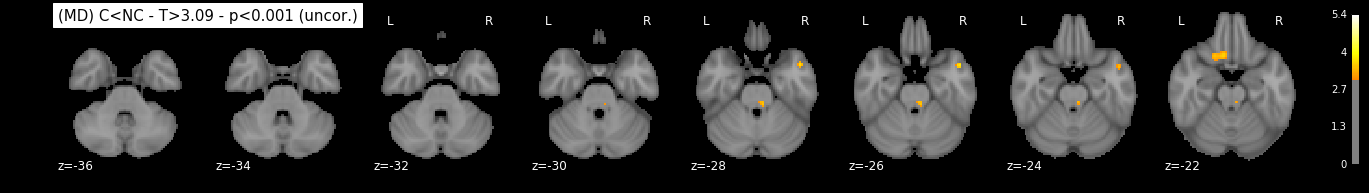

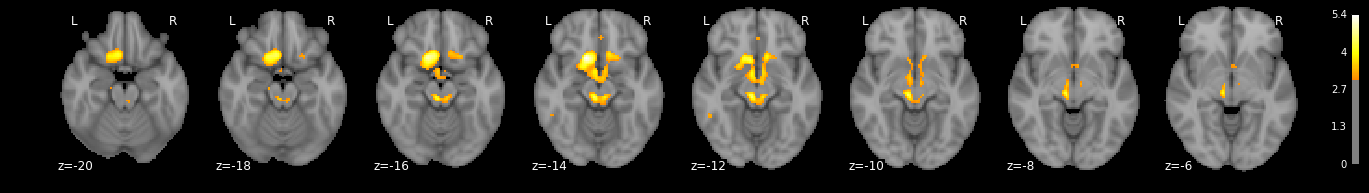

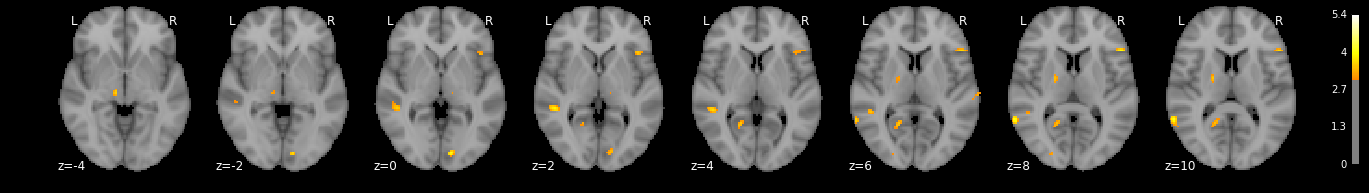

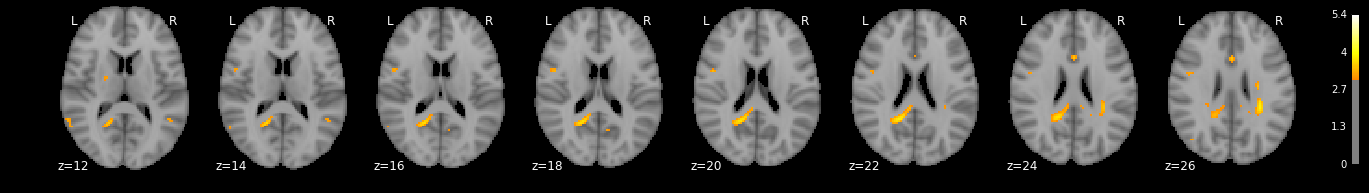

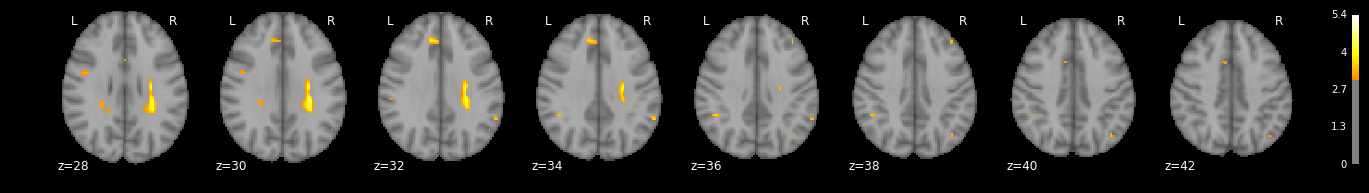

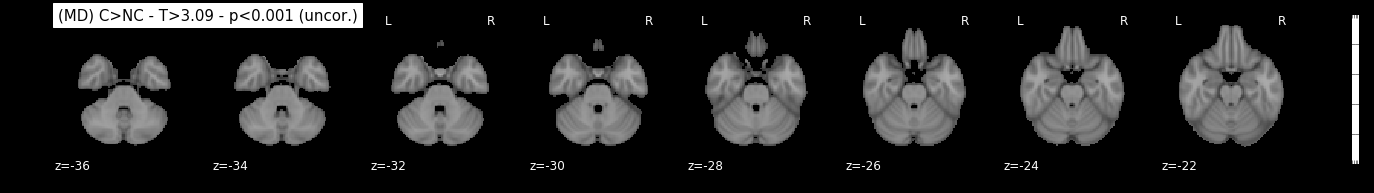

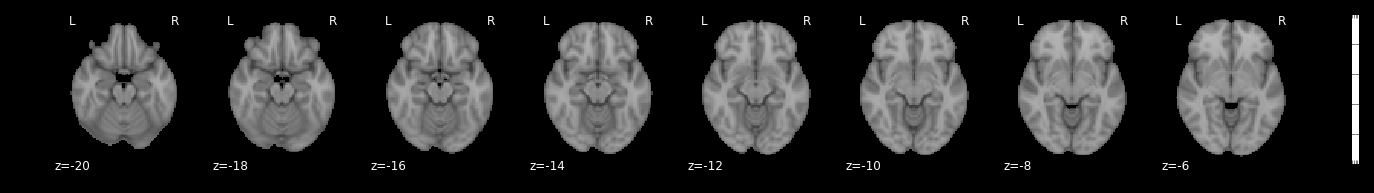

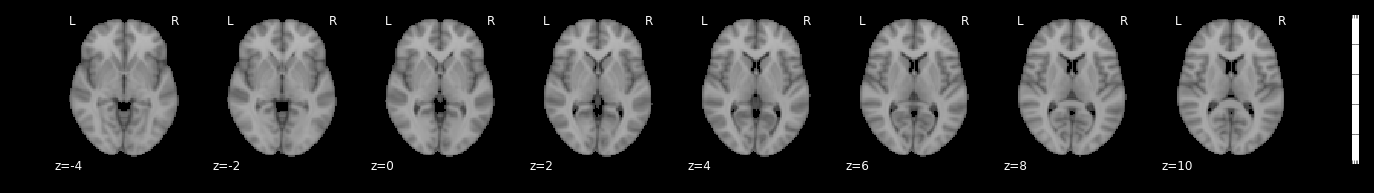

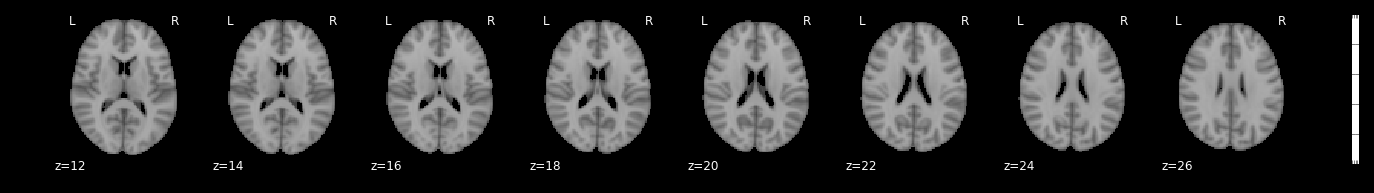

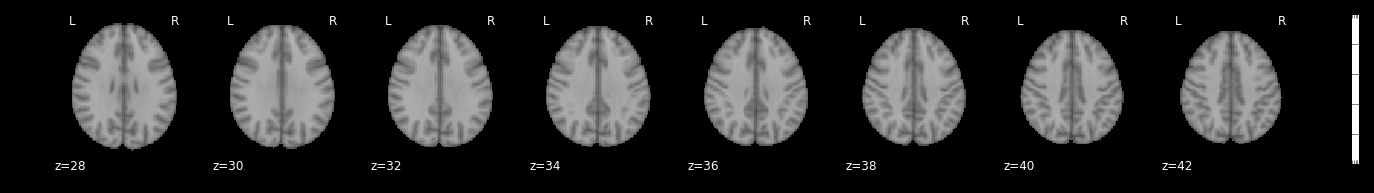

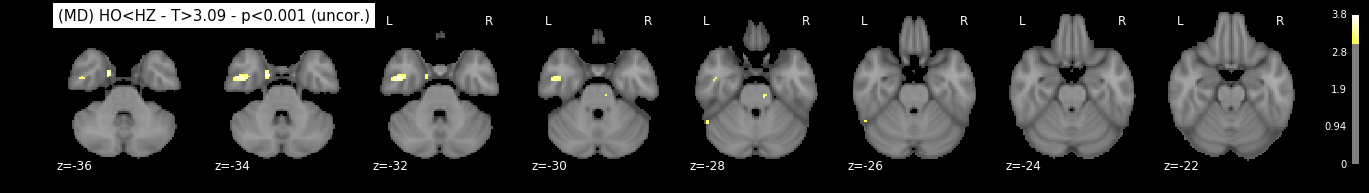

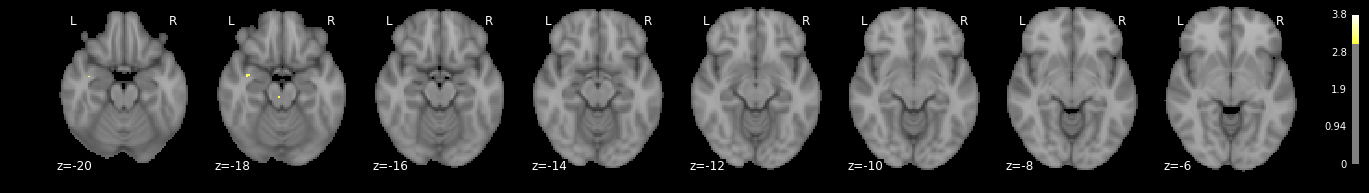

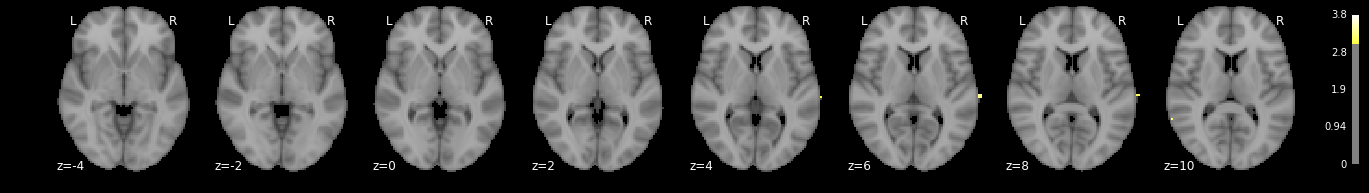

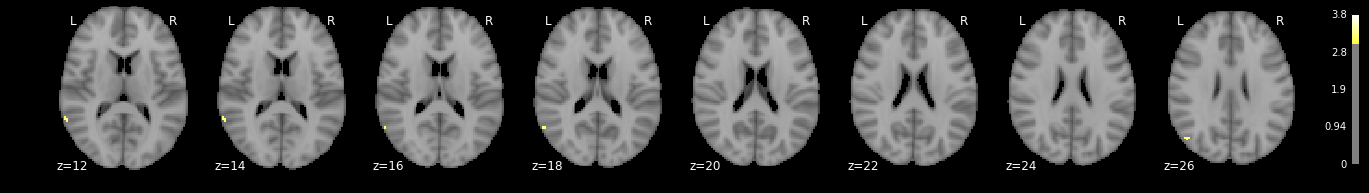

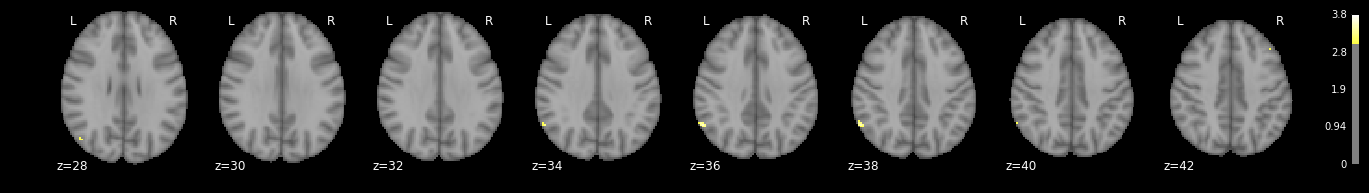

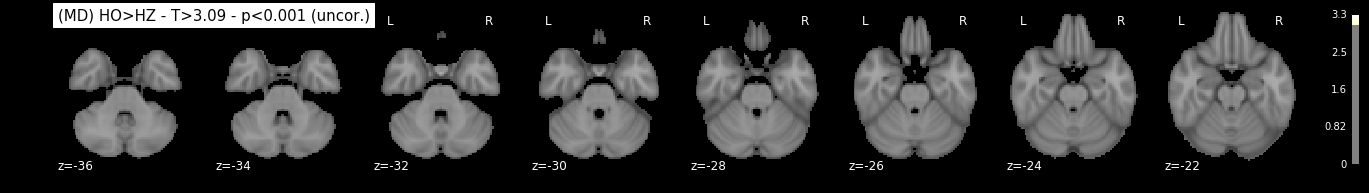

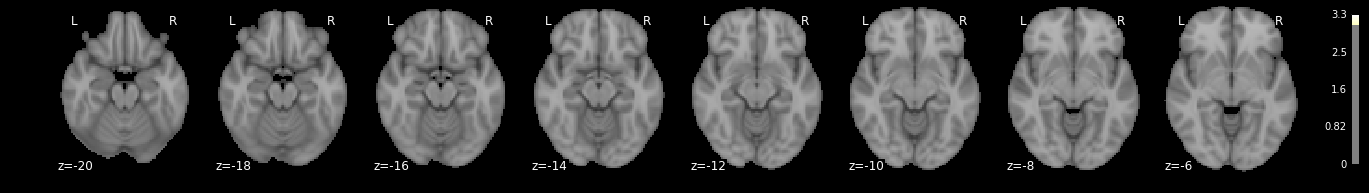

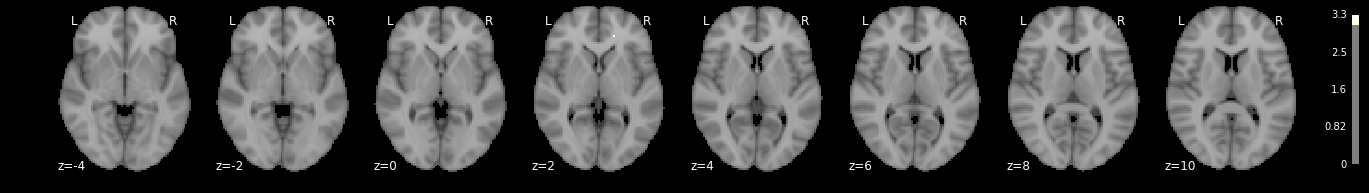

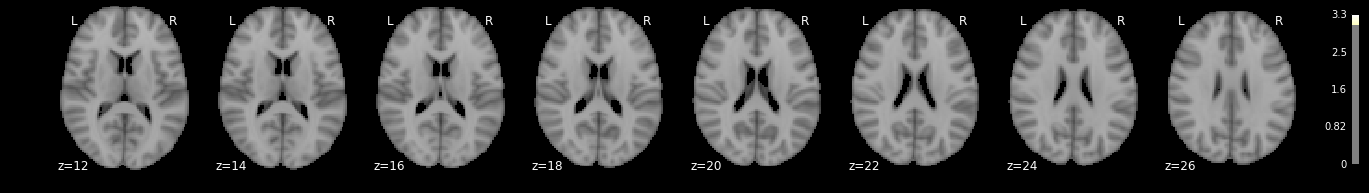

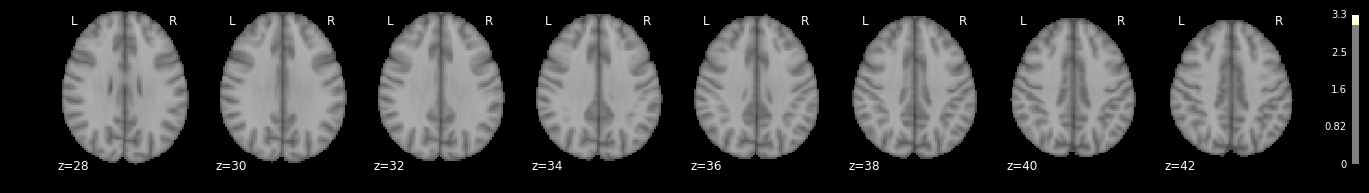

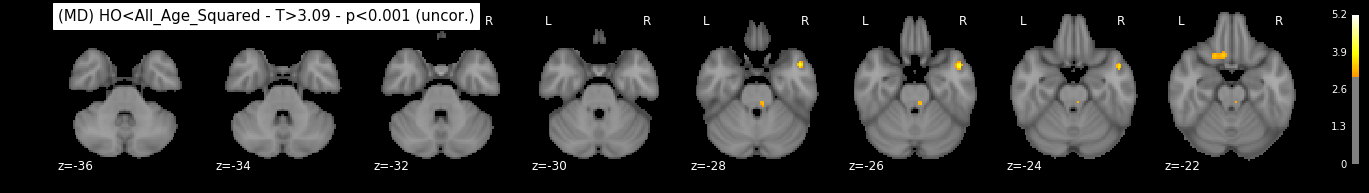

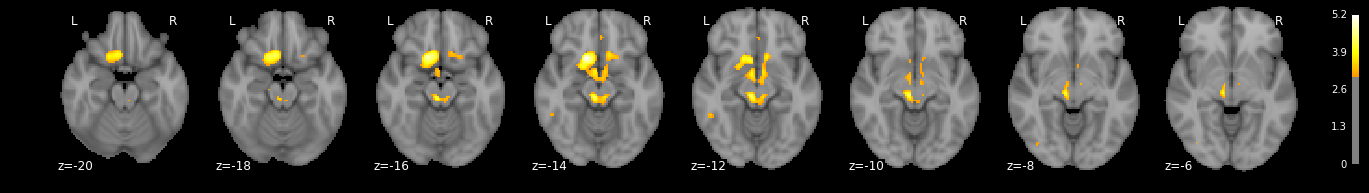

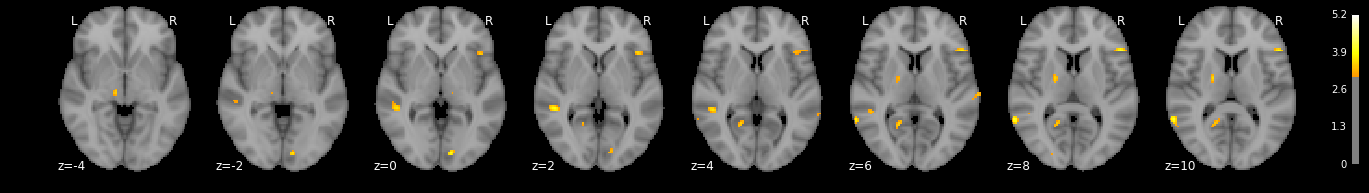

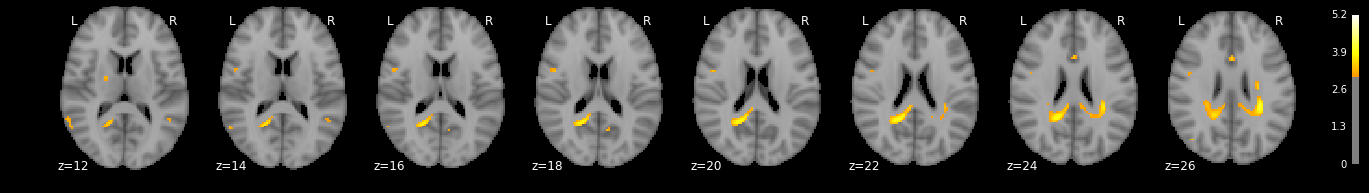

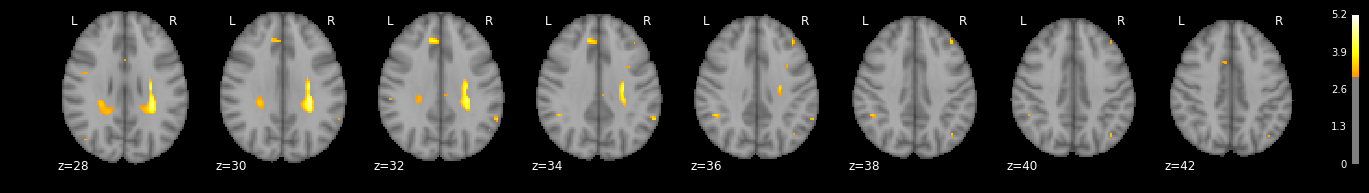

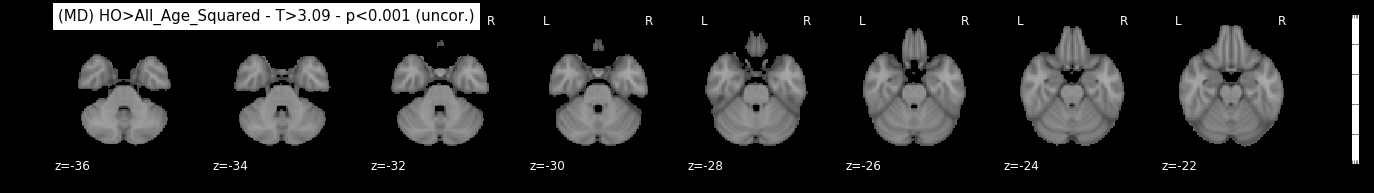

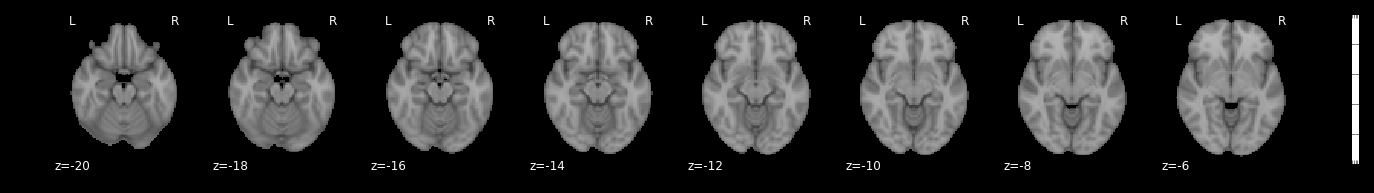

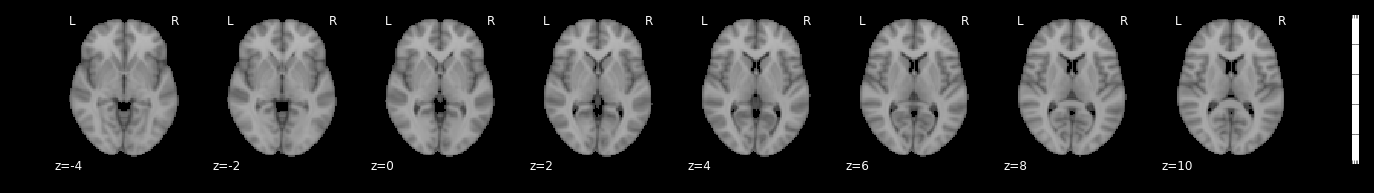

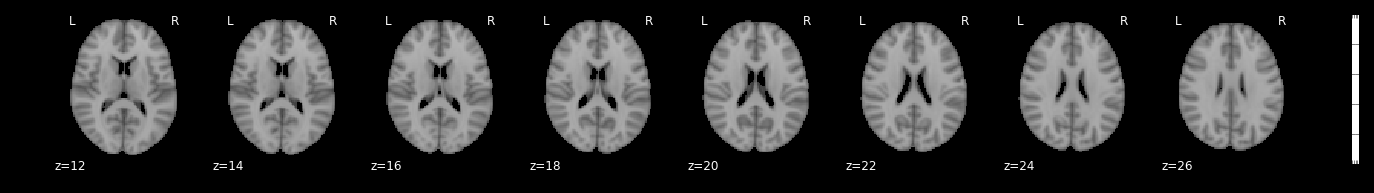

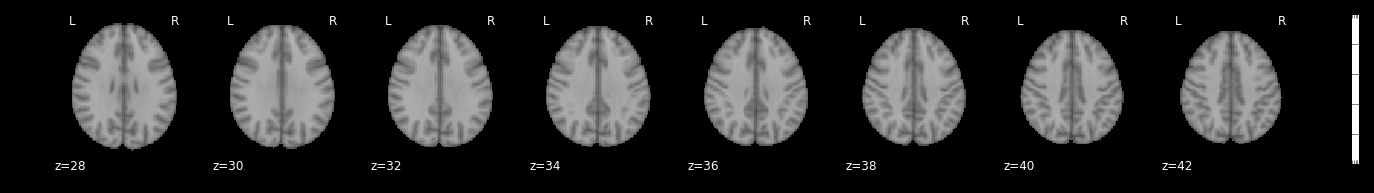

In [15]:
for i in range(1, 2):
    img = osp.join(analysis_wd, 'estimatecontrasts/spmT_00%02d.nii'%i)
    print img
    contrast_name = n3.inputs.contrasts[i-1][0]
    thresholded_map1, threshold1 = map_threshold(img, threshold=0.001, cluster_threshold=0)

    plot_stat_map(thresholded_map1, threshold=threshold1, row_l=8, start=-36, end=36, step=2,
                  title= '(%s) %s - T>%.02f - p<0.001 (uncor.)'%(paramtype, contrast_name, threshold1))
        
plotting.show()